In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#load data from Data Wrangling

working_dir = os.getcwd()
print(working_dir)

train = pd.read_csv('../volcanic_data/train.csv')
data_train = pd.read_csv('../Capstone_Two_Data_Wrangling/data_train.csv')
#minmax data
data_train_scalar = pd.read_csv('../Capstone_Two_Data_Wrangling/data_train_scalar.csv')
#standardscalar
data_train_scalar2 = pd.read_csv('../Capstone_Two_Data_Wrangling/data_train_scalar2.csv')

/Users/alvinqin/Springboard_ds/Springboard/Capstone_Two_EDA


In [2]:
data_train.head(10)

Unnamed: 0  segment_id  time_to_eruption  sensor_1_mean  sensor_1_std  \
0           0  1136037770          12262005      -1.610323    303.096099   
1           1  1969647810          32739612       1.426126    438.360560   
2           2  1895879680          14965999       2.504592    241.575415   
3           3  2068207140          26469720       2.165797    221.967825   
4           4   192955606          31072429       0.073815    261.695935   
5           5  1640671020          22264866       5.765187    385.437067   
6           6   288840453          34952168      -2.262362    365.011221   
7           7  1162441568           9504818       1.099932    731.138523   
8           8  1791400073          11719563      -1.085282    132.652571   
9           9  2059516238          11629084      -1.056799    334.039437   

   sensor_1_min  sensor_1_20  sensor_1_40  sensor_1_60  sensor_1_80  ...  \
0       -1421.0       -249.0        -72.0         72.0        249.0  ...   
1       -2005.0       -333.0        -96.0        100.0        338.0  ...   
2       -1115.0       -195.0        -58.0         58.0        199.0  ...   
3       -1025.0       -171.0        -50.0         52.0        177.0  ...   
4       -1190.0       -216.0        -63.0         62.0        212.0  ...   
5       -1637.0       -312.0        -95.0         96.0        322.0  ...   
6       -2200.0       -263.0        -76.0         76.0        259.0  ...   
7       -2999.0       -601.0       -181.0        184.0        612.0  ...   
8        -627.0       -109.0        -31.0         32.0        107.0  ...   
9       -1428.0       -278.0        -83.0         83.0        278.0  ...   

   sensor_9_80  sensor_9_max  sensor_10_mean  sensor_10_std  sensor_10_min  \
0        306.0        2021.0        2.599440     596.865818        -3527.0   
1        321.6        2189.0       19.895518     932.699662        -4591.0   
2        199.0        1778.0        0.968101     500.544892        -2798.0   
3        189.0        1340.0        8.381444     523.449843        -2911.0   
4        212.0        7725.0       -3.740471     562.748316        -2611.0   
5        277.0        1992.0       -0.476075     818.612428        -4050.0   
6        284.0        2435.0        1.613540     743.664897        -4356.0   
7        774.0        3769.0       13.847186    1173.415488        -4919.0   
8        121.0         857.0       -1.708938     287.324096        -1538.0   
9        334.0        1621.0       -5.659539     613.956330        -3195.0   

   sensor_10_20  sensor_10_40  sensor_10_60  sensor_10_80  sensor_10_max  
0        -503.0        -151.0         159.0         507.0         2187.0  
1        -692.0        -202.0         205.0         710.0         5319.0  
2        -402.0        -121.0         120.0         403.0         2522.0  
3        -400.0        -121.0         122.0         407.0         3614.0  
4        -458.0        -134.0         134.0         449.0         3274.0  
5        -670.0        -200.0         212.0         681.0         3980.0  
6        -531.0        -158.0         160.0         538.0         5105.0  
7        -952.0        -284.0         288.0         983.0         4576.0  
8        -226.0         -67.0          69.0         226.0         1566.0  
9        -500.0        -145.0         144.0         490.0         4109.0  

[10 rows x 83 columns]

In [3]:
data_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data_train.head(10)

segment_id  time_to_eruption  sensor_1_mean  sensor_1_std  sensor_1_min  \
0  1136037770          12262005      -1.610323    303.096099       -1421.0   
1  1969647810          32739612       1.426126    438.360560       -2005.0   
2  1895879680          14965999       2.504592    241.575415       -1115.0   
3  2068207140          26469720       2.165797    221.967825       -1025.0   
4   192955606          31072429       0.073815    261.695935       -1190.0   
5  1640671020          22264866       5.765187    385.437067       -1637.0   
6   288840453          34952168      -2.262362    365.011221       -2200.0   
7  1162441568           9504818       1.099932    731.138523       -2999.0   
8  1791400073          11719563      -1.085282    132.652571        -627.0   
9  2059516238          11629084      -1.056799    334.039437       -1428.0   

   sensor_1_20  sensor_1_40  sensor_1_60  sensor_1_80  sensor_1_max  ...  \
0       -249.0        -72.0         72.0        249.0        1353.0  ...   
1       -333.0        -96.0        100.0        338.0        2197.0  ...   
2       -195.0        -58.0         58.0        199.0        1148.0  ...   
3       -171.0        -50.0         52.0        177.0        1254.0  ...   
4       -216.0        -63.0         62.0        212.0        1114.0  ...   
5       -312.0        -95.0         96.0        322.0        2161.0  ...   
6       -263.0        -76.0         76.0        259.0        2493.0  ...   
7       -601.0       -181.0        184.0        612.0        3185.0  ...   
8       -109.0        -31.0         32.0        107.0         555.0  ...   
9       -278.0        -83.0         83.0        278.0        1368.0  ...   

   sensor_9_80  sensor_9_max  sensor_10_mean  sensor_10_std  sensor_10_min  \
0        306.0        2021.0        2.599440     596.865818        -3527.0   
1        321.6        2189.0       19.895518     932.699662        -4591.0   
2        199.0        1778.0        0.968101     500.544892        -2798.0   
3        189.0        1340.0        8.381444     523.449843        -2911.0   
4        212.0        7725.0       -3.740471     562.748316        -2611.0   
5        277.0        1992.0       -0.476075     818.612428        -4050.0   
6        284.0        2435.0        1.613540     743.664897        -4356.0   
7        774.0        3769.0       13.847186    1173.415488        -4919.0   
8        121.0         857.0       -1.708938     287.324096        -1538.0   
9        334.0        1621.0       -5.659539     613.956330        -3195.0   

   sensor_10_20  sensor_10_40  sensor_10_60  sensor_10_80  sensor_10_max  
0        -503.0        -151.0         159.0         507.0         2187.0  
1        -692.0        -202.0         205.0         710.0         5319.0  
2        -402.0        -121.0         120.0         403.0         2522.0  
3        -400.0        -121.0         122.0         407.0         3614.0  
4        -458.0        -134.0         134.0         449.0         3274.0  
5        -670.0        -200.0         212.0         681.0         3980.0  
6        -531.0        -158.0         160.0         538.0         5105.0  
7        -952.0        -284.0         288.0         983.0         4576.0  
8        -226.0         -67.0          69.0         226.0         1566.0  
9        -500.0        -145.0         144.0         490.0         4109.0  

[10 rows x 82 columns]

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   segment_id        4431 non-null   int64  
 1   time_to_eruption  4431 non-null   int64  
 2   sensor_1_mean     4431 non-null   float64
 3   sensor_1_std      4431 non-null   float64
 4   sensor_1_min      4431 non-null   float64
 5   sensor_1_20       4431 non-null   float64
 6   sensor_1_40       4431 non-null   float64
 7   sensor_1_60       4431 non-null   float64
 8   sensor_1_80       4431 non-null   float64
 9   sensor_1_max      4431 non-null   float64
 10  sensor_2_mean     4431 non-null   float64
 11  sensor_2_std      4431 non-null   float64
 12  sensor_2_min      4431 non-null   float64
 13  sensor_2_20       4431 non-null   float64
 14  sensor_2_40       4431 non-null   float64
 15  sensor_2_60       4431 non-null   float64
 16  sensor_2_80       4431 non-null   float64


In [6]:
df2 = data_train[['segment_id', 'time_to_eruption' ]]
df2.head()

segment_id  time_to_eruption
0  1136037770          12262005
1  1969647810          32739612
2  1895879680          14965999
3  2068207140          26469720
4   192955606          31072429

In [7]:
data_train_scalar.drop(['Unnamed: 0'], axis=1, inplace=True)
data_train_scalar.head()

sensor_1_mean  sensor_1_std  sensor_1_min  sensor_1_20  sensor_1_40  \
0      -1.610323    303.096099       -1421.0       -249.0        -72.0   
1       1.426126    438.360560       -2005.0       -333.0        -96.0   
2       2.504592    241.575415       -1115.0       -195.0        -58.0   
3       2.165797    221.967825       -1025.0       -171.0        -50.0   
4       0.073815    261.695935       -1190.0       -216.0        -63.0   

   sensor_1_60  sensor_1_80  sensor_1_max  sensor_2_mean  sensor_2_std  ...  \
0         72.0        249.0        1353.0       4.613823    678.330828  ...   
1        100.0        338.0        2197.0       2.484442    661.163255  ...   
2         58.0        199.0        1148.0       5.449709    831.469221  ...   
3         52.0        177.0        1254.0      -0.373377    425.189594  ...   
4         62.0        212.0        1114.0       0.000000      0.000000  ...   

   sensor_9_80  sensor_9_max  sensor_10_mean  sensor_10_std  sensor_10_min  \
0        306.0        2021.0        2.599440     596.865818        -3527.0   
1        321.6        2189.0       19.895518     932.699662        -4591.0   
2        199.0        1778.0        0.968101     500.544892        -2798.0   
3        189.0        1340.0        8.381444     523.449843        -2911.0   
4        212.0        7725.0       -3.740471     562.748316        -2611.0   

   sensor_10_20  sensor_10_40  sensor_10_60  sensor_10_80  sensor_10_max  
0        -503.0        -151.0         159.0         507.0         2187.0  
1        -692.0        -202.0         205.0         710.0         5319.0  
2        -402.0        -121.0         120.0         403.0         2522.0  
3        -400.0        -121.0         122.0         407.0         3614.0  
4        -458.0        -134.0         134.0         449.0         3274.0  

[5 rows x 80 columns]

In [8]:
#using MinMaxScaler() to Normalize Data in Python

scaler = preprocessing.MinMaxScaler()
columns = data_train_scalar.columns
d = scaler.fit_transform(data_train_scalar)
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

sensor_1_mean  sensor_1_std  sensor_1_min  sensor_1_20  sensor_1_40  \
0       0.633998      0.014309      0.956633     0.988609     0.988656   
1       0.637240      0.020694      0.938810     0.984766     0.984875   
2       0.638391      0.011404      0.965972     0.991079     0.990862   
3       0.638029      0.010479      0.968719     0.992177     0.992122   
4       0.635796      0.012354      0.963683     0.990118     0.990074   

   sensor_1_60  sensor_1_80  sensor_1_max  sensor_2_mean  sensor_2_std  ...  \
0     0.011232     0.011506      0.041292       0.052764      0.029807  ...   
1     0.015601     0.015619      0.067049       0.052314      0.029053  ...   
2     0.009048     0.009196      0.035035       0.052941      0.036537  ...   
3     0.008112     0.008179      0.038270       0.051711      0.018684  ...   
4     0.009672     0.009797      0.033998       0.051790      0.000000  ...   

   sensor_9_80  sensor_9_max  sensor_10_mean  sensor_10_std  sensor_10_min  \
0     0.016858      0.061678        0.545087       0.025458       0.892361   
1     0.017717      0.066805        0.552803       0.039782       0.859890   
2     0.010963      0.054262        0.544359       0.021349       0.914609   
3     0.010412      0.040895        0.547666       0.022326       0.911161   
4     0.011679      0.235755        0.542258       0.024003       0.920316   

   sensor_10_20  sensor_10_40  sensor_10_60  sensor_10_80  sensor_10_max  
0      0.981417      0.981858      0.017829      0.019140       0.066744  
1      0.974435      0.975730      0.022987      0.026804       0.162328  
2      0.985149      0.985462      0.013456      0.015214       0.076968  
3      0.985222      0.985462      0.013680      0.015365       0.110294  
4      0.983080      0.983900      0.015026      0.016950       0.099918  

[5 rows x 80 columns]

In [9]:
data_train_new = pd.concat([df2, scaled_df], axis=1, join='inner')

In [10]:
data_train_new.head(10)

segment_id  time_to_eruption  sensor_1_mean  sensor_1_std  sensor_1_min  \
0  1136037770          12262005       0.633998      0.014309      0.956633   
1  1969647810          32739612       0.637240      0.020694      0.938810   
2  1895879680          14965999       0.638391      0.011404      0.965972   
3  2068207140          26469720       0.638029      0.010479      0.968719   
4   192955606          31072429       0.635796      0.012354      0.963683   
5  1640671020          22264866       0.641872      0.018196      0.950041   
6   288840453          34952168       0.633302      0.017232      0.932859   
7  1162441568           9504818       0.636891      0.034516      0.908475   
8  1791400073          11719563       0.634558      0.006262      0.980865   
9  2059516238          11629084       0.634589      0.015769      0.956420   

   sensor_1_20  sensor_1_40  sensor_1_60  sensor_1_80  sensor_1_max  ...  \
0     0.988609     0.988656     0.011232     0.011506      0.041292  ...   
1     0.984766     0.984875     0.015601     0.015619      0.067049  ...   
2     0.991079     0.990862     0.009048     0.009196      0.035035  ...   
3     0.992177     0.992122     0.008112     0.008179      0.038270  ...   
4     0.990118     0.990074     0.009672     0.009797      0.033998  ...   
5     0.985727     0.985032     0.014977     0.014880      0.065950  ...   
6     0.987968     0.988026     0.011856     0.011969      0.076083  ...   
7     0.972506     0.971483     0.028705     0.028281      0.097201  ...   
8     0.995013     0.995116     0.004992     0.004945      0.016938  ...   
9     0.987282     0.986923     0.012949     0.012847      0.041749  ...   

   sensor_9_80  sensor_9_max  sensor_10_mean  sensor_10_std  sensor_10_min  \
0     0.016858      0.061678        0.545087       0.025458       0.892361   
1     0.017717      0.066805        0.552803       0.039782       0.859890   
2     0.010963      0.054262        0.544359       0.021349       0.914609   
3     0.010412      0.040895        0.547666       0.022326       0.911161   
4     0.011679      0.235755        0.542258       0.024003       0.920316   
5     0.015260      0.060793        0.543715       0.034916       0.876400   
6     0.015646      0.074313        0.544647       0.031719       0.867061   
7     0.042640      0.115024        0.550104       0.050049       0.849879   
8     0.006666      0.026154        0.543165       0.012255       0.953063   
9     0.018400      0.049471        0.541402       0.026187       0.902493   

   sensor_10_20  sensor_10_40  sensor_10_60  sensor_10_80  sensor_10_max  
0      0.981417      0.981858      0.017829      0.019140       0.066744  
1      0.974435      0.975730      0.022987      0.026804       0.162328  
2      0.985149      0.985462      0.013456      0.015214       0.076968  
3      0.985222      0.985462      0.013680      0.015365       0.110294  
4      0.983080      0.983900      0.015026      0.016950       0.099918  
5      0.975248      0.975970      0.023772      0.025709       0.121464  
6      0.980383      0.981016      0.017941      0.020310       0.155797  
7      0.964829      0.965878      0.032294      0.037110       0.139653  
8      0.991651      0.991950      0.007737      0.008532       0.047792  
9      0.981528      0.982578      0.016147      0.018498       0.125401  

[10 rows x 82 columns]

In [11]:
print(data_train_new.head(),'\n\n')
print(data_train_new.describe(), "\n\n")
print(data_train_new.info(), "\n\n")
print(data_train_new.dtypes, '\n\n')
print(data_train_new.count(), '\n\n')

   segment_id  time_to_eruption  sensor_1_mean  sensor_1_std  sensor_1_min  \
0  1136037770          12262005       0.633998      0.014309      0.956633   
1  1969647810          32739612       0.637240      0.020694      0.938810   
2  1895879680          14965999       0.638391      0.011404      0.965972   
3  2068207140          26469720       0.638029      0.010479      0.968719   
4   192955606          31072429       0.635796      0.012354      0.963683   

   sensor_1_20  sensor_1_40  sensor_1_60  sensor_1_80  sensor_1_max  ...  \
0     0.988609     0.988656     0.011232     0.011506      0.041292  ...   
1     0.984766     0.984875     0.015601     0.015619      0.067049  ...   
2     0.991079     0.990862     0.009048     0.009196      0.035035  ...   
3     0.992177     0.992122     0.008112     0.008179      0.038270  ...   
4     0.990118     0.990074     0.009672     0.009797      0.033998  ...   

   sensor_9_80  sensor_9_max  sensor_10_mean  sensor_10_std  sensor_10_min

/opt/anaconda3/envs/Springboard_Env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density of train data')

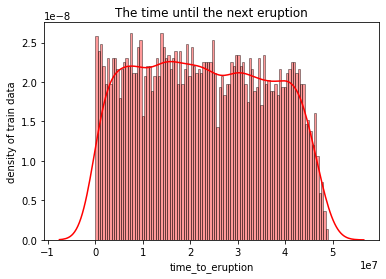

In [12]:
#Time to eruption distrubtion

plot = sns.distplot(data_train_new['time_to_eruption'], 
             hist=True, 
             kde=True, 
             bins=100, 
             color = 'red', 
             hist_kws={'edgecolor':'black'})
plot.set_title("The time until the next eruption", fontsize=12)
plot.set_xlabel("time_to_eruption", fontsize = 10)
plot.set_ylabel("density of train data", fontsize = 10)


In [13]:
#convert new data to csv

data_train_new.to_csv('data_train_new.csv')

In [14]:
#check min max segmentid of time to eruption

display(train.sort_values('time_to_eruption', axis=0, ascending=True).iloc[[0,-1],:])

segment_id  time_to_eruption
590    601524801              6250
1139  1923243961          49046087

In [15]:
segment_id_min =  601524801
segment_id_max = 1923243961

df_segment_id_min = pd.read_csv('../volcanic_data/train/'+str(segment_id_min)+'.csv')
df_segment_id_max = pd.read_csv('../volcanic_data/train/'+str(segment_id_max)+'.csv')

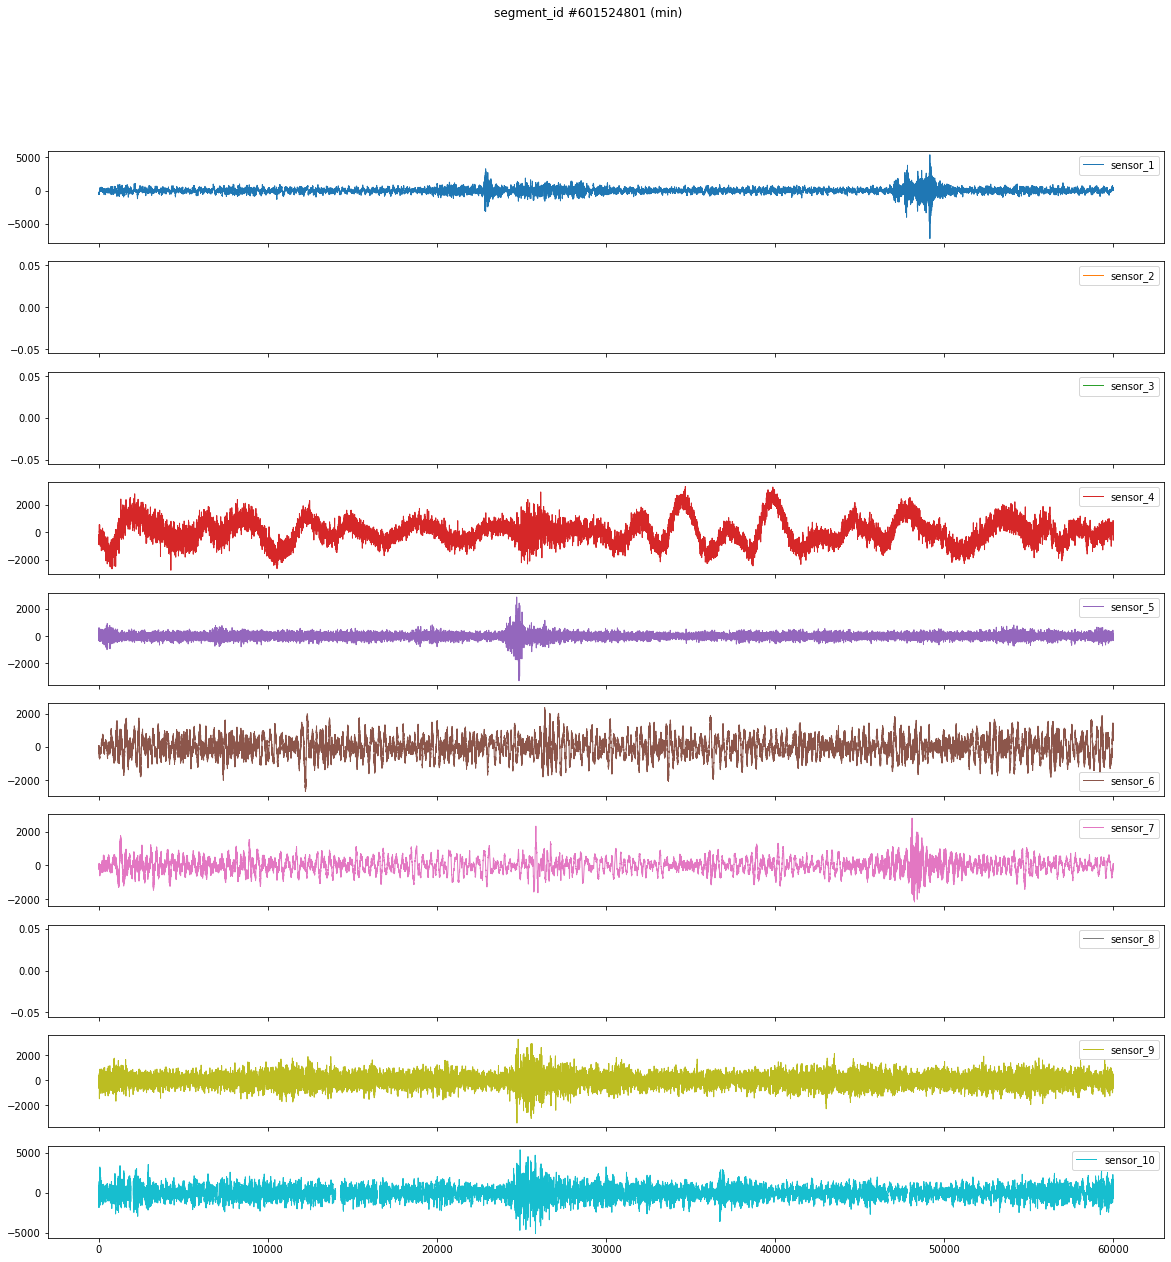

In [16]:
#ploting sensor data for min time to eruption

df_segment_id_min.plot(figsize=(20,20),
                       subplots=True, 
                       layout=(10,1),
                       rot=0, 
                       lw=1, 
                       title='segment_id #601524801 (min)'
                      )

plt.show()

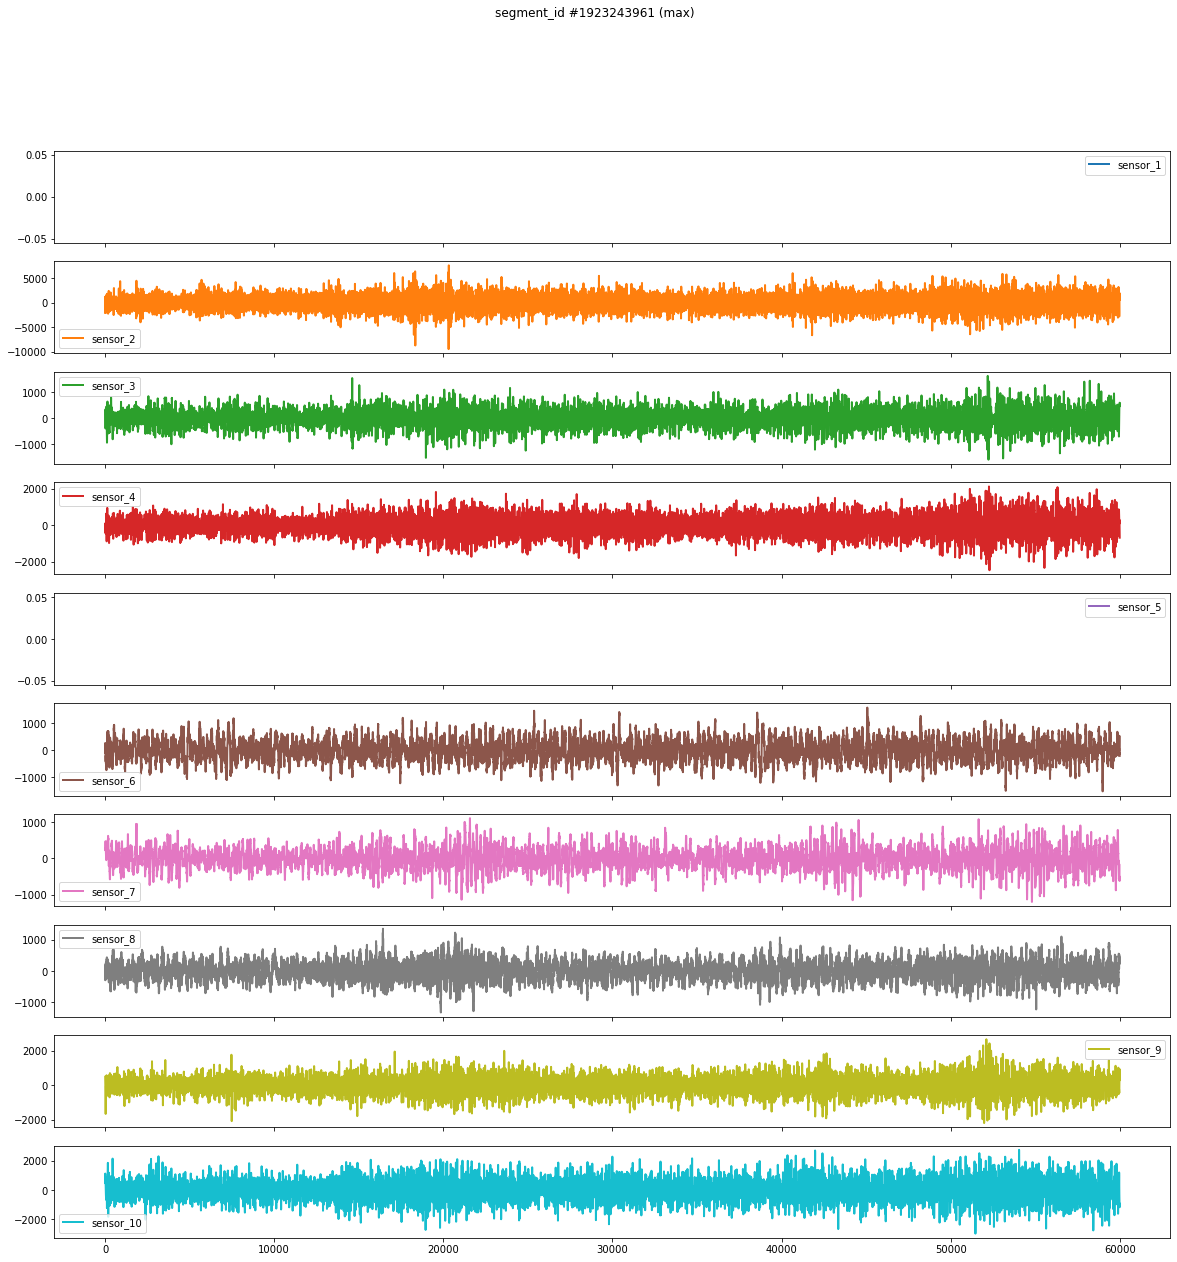

In [17]:
#ploting sensor data for max time to eruption

df_segment_id_max.plot(figsize=(20,20),
                       subplots=True, 
                       layout=(10,1),
                       rot=0, 
                       lw=2, 
                       title='segment_id #1923243961 (max)'
                      )

plt.show()

In [18]:
cols = data_train_new.columns
print(cols)

Index(['segment_id', 'time_to_eruption', 'sensor_1_mean', 'sensor_1_std',
       'sensor_1_min', 'sensor_1_20', 'sensor_1_40', 'sensor_1_60',
       'sensor_1_80', 'sensor_1_max', 'sensor_2_mean', 'sensor_2_std',
       'sensor_2_min', 'sensor_2_20', 'sensor_2_40', 'sensor_2_60',
       'sensor_2_80', 'sensor_2_max', 'sensor_3_mean', 'sensor_3_std',
       'sensor_3_min', 'sensor_3_20', 'sensor_3_40', 'sensor_3_60',
       'sensor_3_80', 'sensor_3_max', 'sensor_4_mean', 'sensor_4_std',
       'sensor_4_min', 'sensor_4_20', 'sensor_4_40', 'sensor_4_60',
       'sensor_4_80', 'sensor_4_max', 'sensor_5_mean', 'sensor_5_std',
       'sensor_5_min', 'sensor_5_20', 'sensor_5_40', 'sensor_5_60',
       'sensor_5_80', 'sensor_5_max', 'sensor_6_mean', 'sensor_6_std',
       'sensor_6_min', 'sensor_6_20', 'sensor_6_40', 'sensor_6_60',
       'sensor_6_80', 'sensor_6_max', 'sensor_7_mean', 'sensor_7_std',
       'sensor_7_min', 'sensor_7_20', 'sensor_7_40', 'sensor_7_60',
       'sensor_7_80', 's

In [19]:
#Next steps: filter each diff columns into a set. and THEN compare them with heatmap and scatterplot. 
#For example: time to eruption vs all 80 diff sensors
#1. Create scatterplots for timetoeruption vs all 80 features
#2. Create box plots for timetoeruption
#3. Also, pick a few segment ids and analyze individually to see if we can create new features

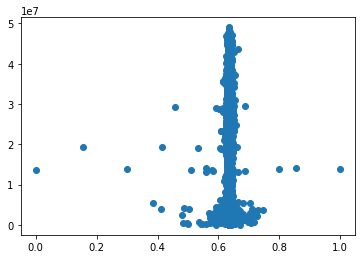

In [21]:
plt.scatter(x=data_train_new['sensor_1_mean'], y=data_train_new['time_to_eruption'])
plt.show()

In [23]:
def scatterplots(columns, ncol=None, figsize=(100, 100)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'time_to_eruption', data=data_train_new, alpha=0.5)
        ax.set(xlabel=col, ylabel='Time to Eruption')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [47]:
features = [ i for i in data_train_new.columns if i not in ['segment_id', 'time_to_eruption']]

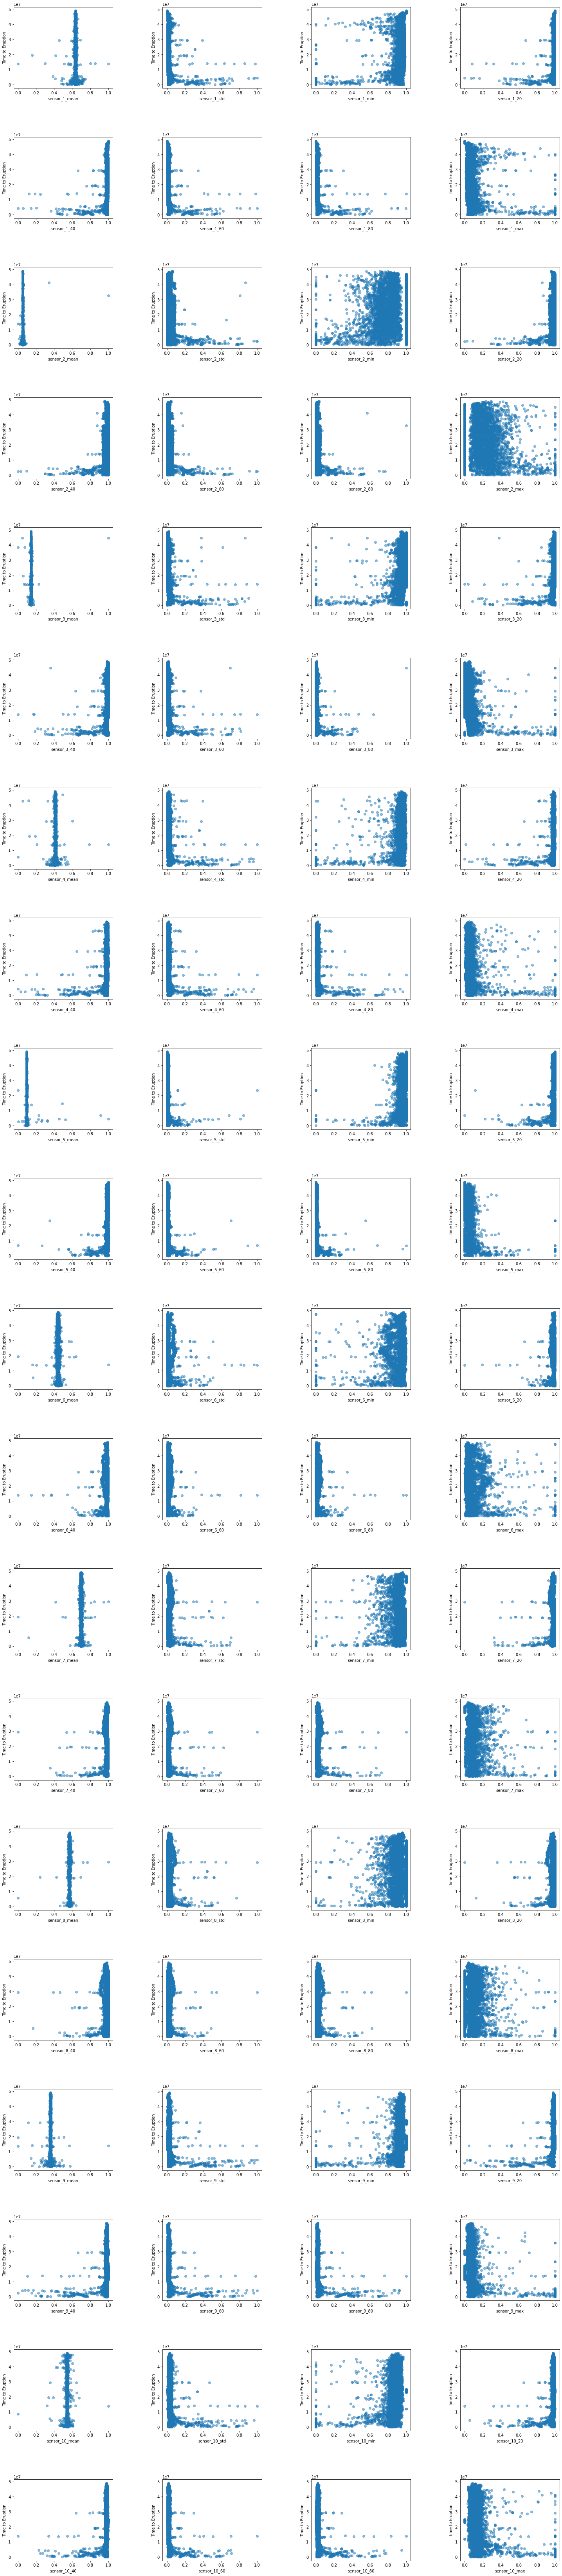

In [48]:
scatterplots(features, ncol=4, figsize=(25, 120))

In [38]:
#correlation matrix: Correlation between sensor readings

sensor_corr = data_train_new.corr(method ='pearson') 
sensor_corr.round(2).style.background_gradient(cmap='RdBu')

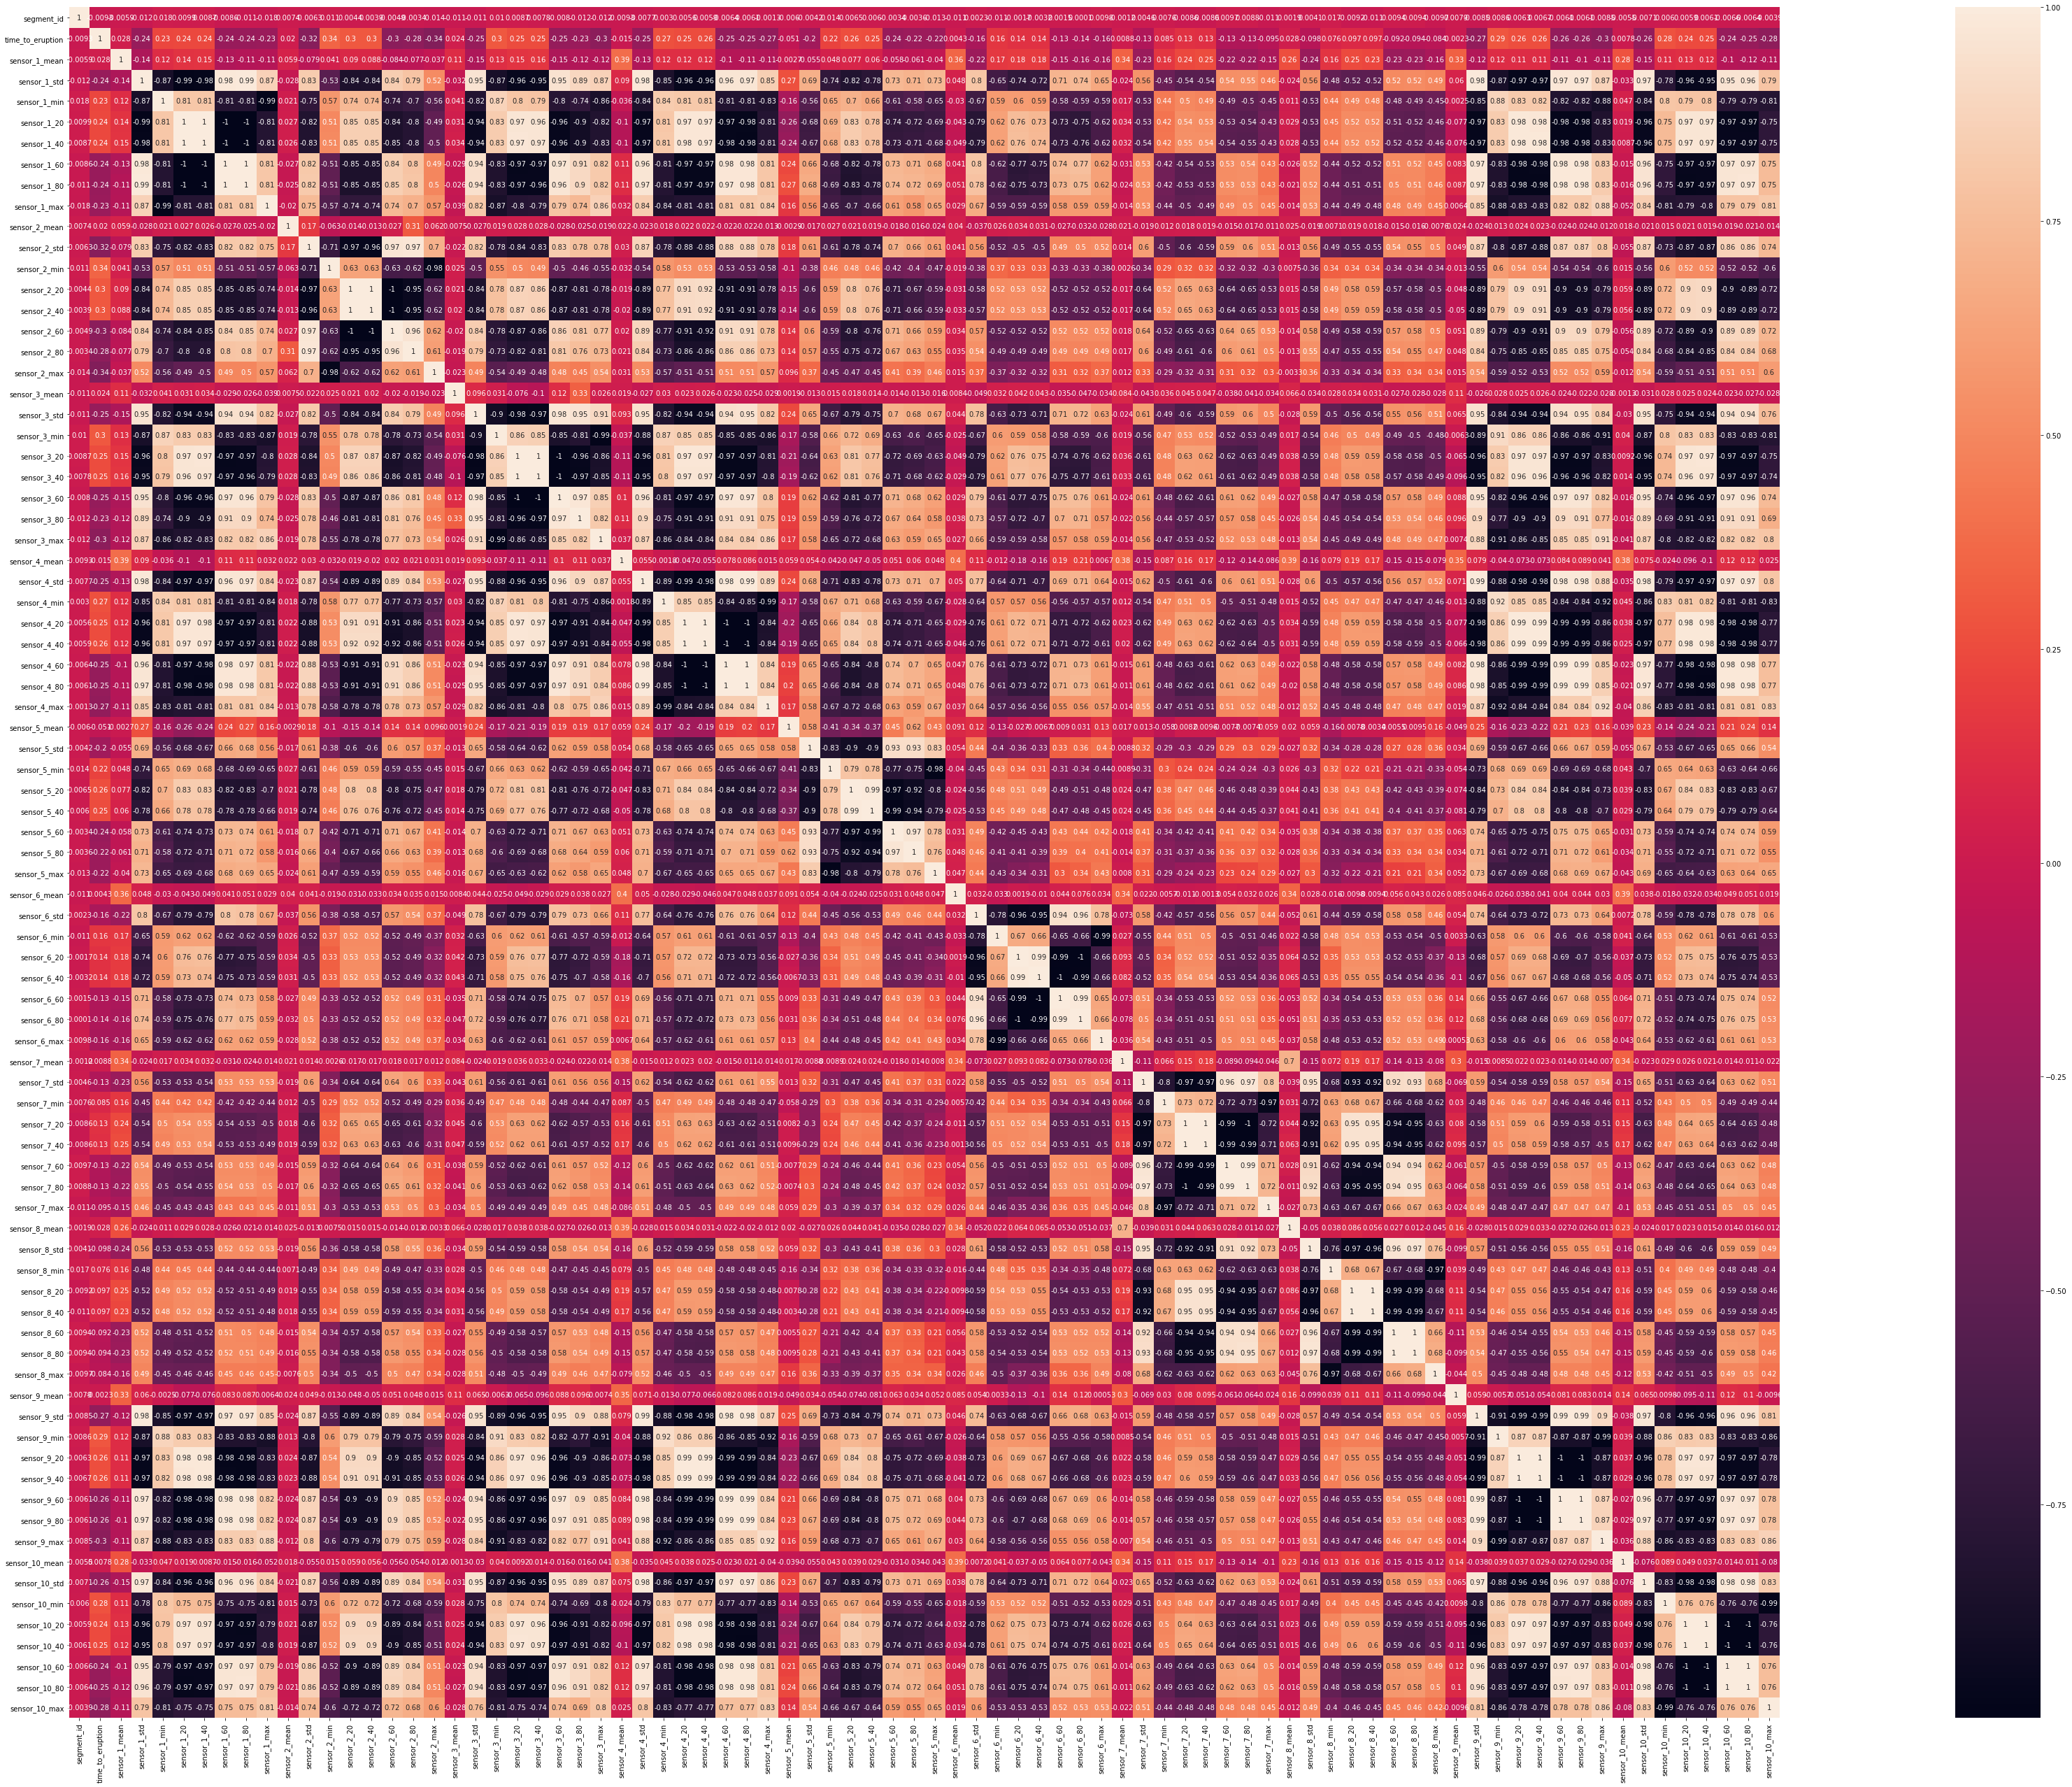

In [45]:
plt.figure(figsize=(90,45))
sns.heatmap(sensor_corr, vmax=1, annot=True, square=True)
plt.show()